In [ ]:
#Don't forget to save your work to your local computer and push to GitHub.
#File -> Download as -> Notebook
#Move file from download folder to local repo clone
#git add filename.ipynb
#git commit -m "put a specific and informative message here of what you worked on"
#git push

# Importing the Data From All of Us

## Importing the Birth data

Note that data from *All of Us* is being imported into *Final_Birth_Concept_Set_for_Import* and cleaned there,
so the import takes some time (about 2 mins)

In [ ]:
# As needed (i.e. once)
!pip install import-ipynb

importing Jupyter notebook from Final_Birth_Concept_Set_for_Import.ipynb


Downloading:   0%|          | 0/390805 [00:00<?, ?rows/s]

<bound method DataFrame.info of         person_id      standard_concept_name  condition_start_datetime
0         7279006  Gestation period, 9 weeks 2021-05-26 21:50:00+00:00
1         1837105  Gestation period, 9 weeks 2016-12-21 00:00:00+00:00
2         2691089  Gestation period, 9 weeks 2020-06-04 06:00:00+00:00
3         1124233  Gestation period, 9 weeks 2021-10-13 00:00:00+00:00
4         5475312  Gestation period, 9 weeks 2019-09-13 00:00:00+00:00
...           ...                        ...                       ...
390800    2561901  Third trimester pregnancy 2021-05-24 09:34:00+00:00
390801    1896215  Third trimester pregnancy 2020-08-25 08:00:00+00:00
390802    2029014  Third trimester pregnancy 2021-07-08 08:47:00+00:00
390803    6063783  Third trimester pregnancy 2021-09-22 13:00:00+00:00
390804    1380091  Third trimester pregnancy 2019-08-27 08:47:00+00:00

[390805 rows x 3 columns]>


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


<bound method DataFrame.info of         person_id                standard_concept_name  \
0         7279006            Gestation period, 9 weeks   
1         1837105            Gestation period, 9 weeks   
2         2691089            Gestation period, 9 weeks   
3         1124233            Gestation period, 9 weeks   
4         5475312            Gestation period, 9 weeks   
...           ...                                  ...   
173722    1935196  Preterm labor with preterm delivery   
173723    2427555  Preterm labor with preterm delivery   
173724    3238425  Preterm labor with preterm delivery   
173725    1934256  Preterm labor with preterm delivery   
173726    1168410  Preterm labor with preterm delivery   

        condition_start_datetime condition_start_date  
0      2021-05-26 21:50:00+00:00           2021-05-26  
1      2016-12-21 00:00:00+00:00           2016-12-21  
2      2020-06-04 06:00:00+00:00           2020-06-04  
3      2021-10-13 00:00:00+00:00           2021

Final_Birth_Concept_Set_for_Import.ipynb:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "execution_count": 1,


Entries removed: 5711
Entries kept: 15601
Statistics for Term:
          person_id  gestational_age_at_birth   birth_order
count  1.343400e+04              13434.000000  13434.000000
mean   2.958510e+06                 38.841638      1.276165
std    2.116125e+06                  1.067879      0.530288
min    1.000131e+06                 37.000000      1.000000
25%    1.565325e+06                 38.000000      1.000000
50%    2.200748e+06                 39.000000      1.000000
75%    3.260879e+06                 40.000000      1.000000
max    9.998770e+06                 44.000000      5.000000

Statistics for Preterm:
          person_id  gestational_age_at_birth  birth_order
count  2.167000e+03               2167.000000  2167.000000
mean   2.857171e+06                 33.389149     1.228426
std    2.002075e+06                  3.381602     0.488997
min    1.001034e+06                 22.000000     1.000000
25%    1.559583e+06                 32.000000     1.000000
50%    2.174813e+0

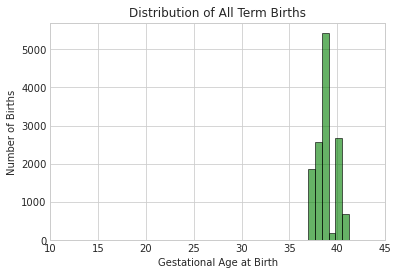

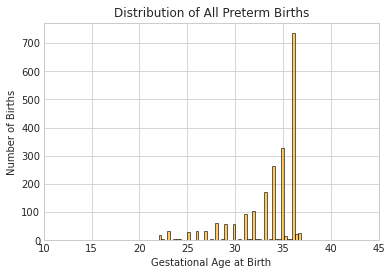

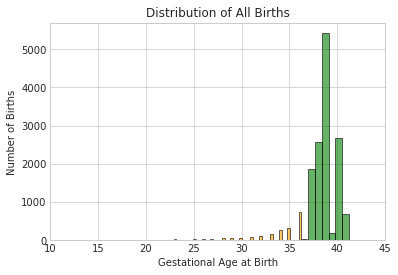

In [1]:
import import_ipynb
from Final_Birth_Concept_Set_for_Import import *

## Importing the *Person* data

In [2]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "person" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_person_sql = """
    SELECT
        person.person_id,
        person.gender_concept_id,
        p_gender_concept.concept_name as gender,
        person.birth_datetime as date_of_birth,
        person.race_concept_id,
        p_race_concept.concept_name as race,
        person.ethnicity_concept_id,
        p_ethnicity_concept.concept_name as ethnicity,
        person.sex_at_birth_concept_id,
        p_sex_at_birth_concept.concept_name as sex_at_birth 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.person` person 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_gender_concept 
            ON person.gender_concept_id = p_gender_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_race_concept 
            ON person.race_concept_id = p_race_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_ethnicity_concept 
            ON person.ethnicity_concept_id = p_ethnicity_concept.concept_id 
    LEFT JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.concept` p_sex_at_birth_concept 
            ON person.sex_at_birth_concept_id = p_sex_at_birth_concept.concept_id  
    WHERE
        person.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) )  
                    AND (person.PERSON_ID IN (SELECT
                        DISTINCT person_id  
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` 
                    WHERE
                        has_ehr_data = 1))"""

dataset_30352193_person_df = pandas.read_gbq(
    dataset_30352193_person_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_person_df.head(5)

Downloading:   0%|          | 0/17524 [00:00<?, ?rows/s]

## Importing the *Zip Code* data

In [3]:
import pandas
import os

# This query represents dataset "AS_KG_Dataset" for domain "zip_code_socioeconomic" and was generated for All of Us Controlled Tier Dataset v7
dataset_30352193_zip_code_socioeconomic_sql = """
    SELECT
        observation.person_id,
        observation.observation_datetime,
        zip_code.zip3_as_string as zip_code,
        zip_code.fraction_assisted_income as assisted_income,
        zip_code.fraction_high_school_edu as high_school_education,
        zip_code.median_income,
        zip_code.fraction_no_health_ins as no_health_insurance,
        zip_code.fraction_poverty as poverty,
        zip_code.fraction_vacant_housing as vacant_housing,
        zip_code.deprivation_index,
        zip_code.acs as american_community_survey_year 
    FROM
        `""" + os.environ["WORKSPACE_CDR"] + """.zip3_ses_map` zip_code 
    JOIN
        `""" + os.environ["WORKSPACE_CDR"] + """.observation` observation 
            ON CAST(SUBSTR(observation.value_as_string,
        0,
        STRPOS(observation.value_as_string,
        '*') - 1) AS INT64) = zip_code.zip3  
    WHERE
        observation.PERSON_ID IN (
            SELECT
                distinct person_id  
            FROM
                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
            WHERE
                cb_search_person.person_id IN (
                    SELECT
                        criteria.person_id 
                    FROM
                        (SELECT
                            DISTINCT person_id,
                            entry_date,
                            concept_id 
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                        WHERE
                            (
                                concept_id IN (
                                    SELECT
                                        DISTINCT c.concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                    JOIN
                                        (
                                            select
                                                cast(cr.id as string) as id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                            WHERE
                                                concept_id IN (36712702, 45757176, 4014295) 
                                                AND full_text LIKE '%_rank1]%'
                                        ) a 
                                            ON (
                                                c.path LIKE CONCAT('%.',
                                            a.id,
                                            '.%') 
                                            OR c.path LIKE CONCAT('%.',
                                            a.id) 
                                            OR c.path LIKE CONCAT(a.id,
                                            '.%') 
                                            OR c.path = a.id) 
                                        WHERE
                                            is_standard = 1 
                                            AND is_selectable = 1
                                        ) 
                                        AND is_standard = 1 
                                )
                            ) criteria 
                        ) ) 
                    AND observation_source_concept_id = 1585250 
                    AND observation.value_as_string NOT LIKE 'Res%'"""

dataset_30352193_zip_code_socioeconomic_df = pandas.read_gbq(
    dataset_30352193_zip_code_socioeconomic_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

#dataset_30352193_zip_code_socioeconomic_df.head(5)

Downloading:   0%|          | 0/17517 [00:00<?, ?rows/s]

## Importing the *BMI* data

In [4]:
import pandas
import os

# This query represents dataset "BMI Dataset" for domain "measurement" and was generated for All of Us Controlled Tier Dataset v7
dataset_92747408_measurement_sql = """
    SELECT
        measurement.person_id,
        m_standard_concept.concept_name as standard_concept_name,
        measurement.measurement_datetime,
        measurement.value_as_number 
    FROM
        ( SELECT
            * 
        FROM
            `""" + os.environ["WORKSPACE_CDR"] + """.measurement` measurement 
        WHERE
            (
                measurement_source_concept_id IN  (
                    SELECT
                        DISTINCT c.concept_id 
                    FROM
                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                    JOIN
                        (
                            select
                                cast(cr.id as string) as id 
                            FROM
                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                            WHERE
                                concept_id IN (
                                    903124
                                ) 
                                AND full_text LIKE '%_rank1]%'
                        ) a 
                            ON (
                                c.path LIKE CONCAT('%.',
                            a.id,
                            '.%') 
                            OR c.path LIKE CONCAT('%.',
                            a.id) 
                            OR c.path LIKE CONCAT(a.id,
                            '.%') 
                            OR c.path = a.id) 
                        WHERE
                            is_standard = 0 
                            AND is_selectable = 1
                        )
                )  
                AND (
                    measurement.PERSON_ID IN (
                        SELECT
                            distinct person_id  
                        FROM
                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_person` cb_search_person  
                        WHERE
                            cb_search_person.person_id IN (
                                SELECT
                                    criteria.person_id 
                                FROM
                                    (SELECT
                                        DISTINCT person_id,
                                        entry_date,
                                        concept_id 
                                    FROM
                                        `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                    WHERE
                                        (
                                            concept_id IN (
                                                SELECT
                                                    DISTINCT c.concept_id 
                                                FROM
                                                    `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` c 
                                                JOIN
                                                    (
                                                        select
                                                            cast(cr.id as string) as id 
                                                        FROM
                                                            `""" + os.environ["WORKSPACE_CDR"] + """.cb_criteria` cr 
                                                        WHERE
                                                            concept_id IN (36712702, 45757176, 4014295) 
                                                            AND full_text LIKE '%_rank1]%'
                                                    ) a 
                                                        ON (
                                                            c.path LIKE CONCAT('%.',
                                                        a.id,
                                                        '.%') 
                                                        OR c.path LIKE CONCAT('%.',
                                                        a.id) 
                                                        OR c.path LIKE CONCAT(a.id,
                                                        '.%') 
                                                        OR c.path = a.id) 
                                                    WHERE
                                                        is_standard = 1 
                                                        AND is_selectable = 1
                                                    ) 
                                                    AND is_standard = 1 
                                            )
                                        ) criteria 
                                    ) 
                                    AND cb_search_person.person_id IN (
                                        SELECT
                                            criteria.person_id 
                                        FROM
                                            (SELECT
                                                DISTINCT person_id,
                                                entry_date,
                                                concept_id 
                                            FROM
                                                `""" + os.environ["WORKSPACE_CDR"] + """.cb_search_all_events` 
                                            WHERE
                                                (
                                                    concept_id IN (903124) 
                                                    AND is_standard = 0 
                                                )) criteria ) 
                                    )
                                )) measurement 
                        LEFT JOIN
                            `""" + os.environ["WORKSPACE_CDR"] + """.concept` m_standard_concept 
                                ON measurement.measurement_concept_id = m_standard_concept.concept_id"""

dataset_92747408_measurement_df = pandas.read_gbq(
    dataset_92747408_measurement_sql,
    dialect="standard",
    use_bqstorage_api=("BIGQUERY_STORAGE_API_ENABLED" in os.environ),
    progress_bar_type="tqdm_notebook")

# dataset_92747408_measurement_df.head(5)

Downloading:   0%|          | 0/16016 [00:00<?, ?rows/s]

# Combining each data frame into a single data frame

## Importing needed packages

In [5]:
import pandas as pd

## Renaming individual data frames and dropping columns we don't need

In [6]:
# condition_df

condition_df = final_birth_data



# person_df

person_df_drop_columns = ['gender_concept_id', 'race_concept_id', 'ethnicity_concept_id', 'sex_at_birth_concept_id']

person_df = dataset_30352193_person_df.drop(columns=person_df_drop_columns)



# zip_df

# note this wikipedia list of zip_code prefixes (i.e. first 3 digits):
# https://en.wikipedia.org/wiki/List_of_ZIP_Code_prefixes

zip_df = dataset_30352193_zip_code_socioeconomic_df




# bmi_df

bmi_df_drop_columns = ['standard_concept_name', 'measurement_datetime']

bmi_df = dataset_92747408_measurement_df.drop(columns=bmi_df_drop_columns)

## Finding common values of *person_id* and restricting data frames to rows with common values

In [7]:
# create a dictionary of values of person_id and multiplicities in each data frame

## start by creating sets of unique ids

unique_ids_condition = list(condition_df.person_id.unique())
unique_ids_person = list(person_df.person_id.unique())
unique_ids_zip = list(zip_df.person_id.unique())
unique_ids_bmi = list(bmi_df.person_id.unique())

In [8]:
## create a set of values of person_id that occur in each data frame
## we then sort common_ids in ascending order

## since we only have four data frames, easy to construct full hierarchy, if we want

common_ids = []

for pid in unique_ids_condition:
    if (pid in unique_ids_person) and (pid in unique_ids_zip) and (pid in unique_ids_bmi):
        common_ids.append(pid)

common_ids.sort()

In [9]:
## restrict data frames to rows with personal_id values in common_ids
## Also, we sort by person_id

## For restricted condition, we primarily sort by person_id, but
## for each value of person_id, we then sort by birth order

restricted_condition = condition_df[condition_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id", "birth_order"])
restricted_person = person_df[person_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_zip = zip_df[zip_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])
restricted_bmi = bmi_df[bmi_df["person_id"].isin(common_ids)].copy().sort_values(by=["person_id"])

## Merging *restricted_person* and *restricted_zip*

In [10]:
## restricted_condition, restricted_person, and restricted_zip all have the same values of person_id occuring in them
## each value of person_id occurs only once in restricted_person and restricted_zip
## we start by simply merging restricted_person and restricted_zip along person_id

combined_df_half = pd.merge(restricted_person, restricted_zip, on='person_id')

## next, we rename the columns to identify which data frame they originally came from

person_zip_col_dict = {}

for col in restricted_person.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_person"

for col in restricted_zip.columns:
    if col != 'person_id':
        person_zip_col_dict[col] = col+"_zip"

combined_df_half = combined_df_half.rename(columns=person_zip_col_dict)

## Merging *combined_df_half* and *restricted_bmi*

In [ ]:
# check to see if restricted_bmi has multiple instances of any value of person_id

#bmi_dict = {}

#for pid in common_ids:
#    if pid in bmi_dict.keys():
#        bmi_dict[pid] += 1
#    else:
#        bmi_dict[pid] = 1

#bmi_max = max(bmi_dict.values())

#print(bmi_max)

# As of 14 Nov 2023, restricted_bmi has exactly one instance of every value of person_id in common_ids

In [11]:
combined_df_half = pd.merge(combined_df_half, restricted_bmi, on='person_id')

combined_df_half = combined_df_half.rename(columns={'value_as_number': 'BMI'})

## Adding the *condition* data

### We start by splitting up *restricted_condition* by *birth_order*

In [12]:
## Note that as of 11 Nov 2023, we see
## Everyone has a first birth
## 3127 out of 11952 have a second birth
## 467 out of 11952 have a third birth
## For run time concerns, we only include first and second births

first_birth = restricted_condition[restricted_condition['birth_order'] == 1].copy().sort_values(by=["person_id"])
second_birth = restricted_condition[restricted_condition['birth_order'] == 2].copy().sort_values(by=["person_id"])
#third_birth = restricted_condition[restricted_condition['birth_order'] == 3].copy().sort_values(by=["person_id"])
#fourth_birth = restricted_condition[restricted_condition['birth_order'] == 4].copy().sort_values(by=["person_id"])
#fifth_birth = restricted_condition[restricted_condition['birth_order'] == 5].copy().sort_values(by=["person_id"])

### The following code was for establishing the "wide format" of our data. Keeping it around for now

In [ ]:
## We now reset the indexing on second_birth to easily add our extra rows

##second_birth.reset_index(drop=True, inplace=True)

##last_index = second_birth.index.max()

##true_second_birthers = second_birth.person_id.tolist()

##for pid in common_ids:
##    if pid not in true_second_birthers:
##        last_index += 1
##        second_birth.loc[last_index] = [pid, None, None, None, 2]

##second_birth = second_birth.sort_values(by=["person_id"])

In [ ]:
### We update the column names in *first_birth* and *second_birth* before merging and drop *birth_order*

##first_birth_dict = {}

##for col in first_birth.columns:
##    if col != 'person_id':
##        first_birth_dict[col] = "first_"+col
        
##second_birth_dict = {}

##for col in second_birth.columns:
##    if col != 'person_id':
##        second_birth_dict[col] = "second_"+col

##first_birth = first_birth.rename(columns=first_birth_dict)
##second_birth = second_birth.rename(columns=second_birth_dict)

##first_birth = first_birth.drop(columns=['first_birth_order'])
##second_birth = second_birth.drop(columns=['second_birth_order'])

### Next, we make two the final data frames we will merge to get *combined_df*

In [13]:
combined_df_first_births = pd.merge(combined_df_half, first_birth, on='person_id')

In [14]:
# first, restrict our copy of combined_df_half to values of person_id present in second_birth

combined_df_second_births = combined_df_half.copy()


second_birthers = second_birth.person_id.tolist()


combined_df_second_births = combined_df_second_births[combined_df_second_births['person_id'].isin(second_birthers)].copy()
combined_df_second_births = combined_df_second_births.sort_values(by=["person_id"])


combined_df_second_births = pd.merge(combined_df_second_births, second_birth, on='person_id')

### Finally, we concatenate the two data frames into one data frame

In [15]:
combined_df = pd.concat([combined_df_first_births, combined_df_second_births])

combined_df = combined_df.sort_values(by=["person_id", "birth_order"])

combined_df.reset_index(inplace=True)

combined_df.drop(columns=['index'])

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,...,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,BMI,condition_start_date,birth_class,gestational_age_at_birth,birth_order
0,1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,...,10.762228,13.981854,12.360850,0.331276,2017,36.500000,2021-09-22,Term,39.0,1
1,1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,...,11.049983,29.653439,5.505385,0.485979,2017,28.299999,2021-08-10,Term,40.0,1
2,1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,...,6.287592,18.639903,15.527784,0.360499,2017,40.599998,2019-08-06,Term,40.0,1
3,1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.587510,66.084673,...,16.807387,16.542301,2.669649,0.397667,2017,28.700001,2018-11-09,Term,40.0,1
4,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,...,17.148201,22.064159,10.368943,0.409916,2017,28.900000,2017-06-28,Term,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13279,9977453,Female,1982-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2021-12-22 20:03:22+00:00,104**,38.279736,70.896923,...,11.049983,29.653439,5.505385,0.485979,2017,33.500000,2022-05-05,Term,39.0,1
13280,9981792,Female,1976-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2022-04-11 21:45:02+00:00,100**,17.355981,85.665558,...,6.863952,17.753432,11.598508,0.314289,2017,22.799999,2018-01-08,Term,39.0,1
13281,9982785,Female,1992-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2021-06-17 17:50:48+00:00,853**,13.019775,85.134547,...,10.762228,13.981854,12.360850,0.331276,2017,27.799999,2021-06-30,Term,39.0,1
13282,9989602,Female,1991-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-03-02 17:37:55+00:00,853**,13.019775,85.134547,...,10.762228,13.981854,12.360850,0.331276,2017,29.799999,2017-01-14,Term,37.0,1


In [ ]:
## pd.options.display.max_columns = None
## combined_df.head(8)

## The final data frame

### We rename the data frame as *birth* and add a copy of *birth_class* as a binary variable

In [16]:
birth = combined_df.copy().drop(columns=['index'])

birth['birth_class_binary'] = 1

birth.loc[birth.birth_class=='Preterm', 'birth_class_binary'] = 0

In [17]:
pd.options.display.max_columns = None
birth.head(8)

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,BMI,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary
0,1000131,"Not man only, not woman only, prefer not to an...",2002-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-09-09 17:18:12+00:00,853**,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2017,36.500000,2021-09-22,Term,39.0,1,1
1,1000195,Female,1982-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-04-15 19:33:14+00:00,104**,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2017,28.299999,2021-08-10,Term,40.0,1,1
2,1000724,Female,1999-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2017-09-19 13:40:32+00:00,154**,20.910346,88.333925,42632.000716,6.287592,18.639903,15.527784,0.360499,2017,40.599998,2019-08-06,Term,40.0,1,1
3,1001000,Female,1999-06-15 00:00:00+00:00,Black or African American,Hispanic or Latino,Female,2020-02-13 18:47:27+00:00,927**,15.587510,66.084673,69333.203649,16.807387,16.542301,2.669649,0.397667,2017,28.700001,2018-11-09,Term,40.0,1,1
4,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2017,28.900000,2017-06-28,Term,39.0,1,1
5,1001034,Female,1989-06-15 00:00:00+00:00,None of these,What Race Ethnicity: Race Ethnicity None Of These,Female,2019-05-17 18:48:39+00:00,850**,18.509215,78.387333,54223.044605,17.148201,22.064159,10.368943,0.409916,2017,28.900000,2019-06-29,Preterm,29.0,2,0
6,1001207,Female,1985-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2019-08-14 19:24:56+00:00,104**,38.279736,70.896923,39407.415829,11.049983,29.653439,5.505385,0.485979,2017,28.000000,2020-02-15,Term,40.0,1,1
7,1001211,Female,1984-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2020-03-06 18:13:48+00:00,852**,7.859758,91.715470,74084.321643,9.686876,12.378430,11.347596,0.279662,2017,23.799999,2016-09-19,Term,40.0,1,1


# Modeling

## Logisitic Regression

### Importing packages

In [18]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
#from sklearn.metrics import precision_score
#from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression

### Train-test splits

Births worldwide are much more likey to be term births than preterm births; this is reflected in our data. Consequently, we will be using stratified splits.

In [20]:
birth_train, birth_test = train_test_split(birth.copy(),
                                          shuffle=True,
                                          random_state=650,
                                          stratify=birth['birth_class'])

#### Verifying train-test splits

In [21]:
birth_train.birth_class.value_counts(normalize=True)

Term       0.858978
Preterm    0.141022
Name: birth_class, dtype: float64

In [22]:
birth_test.birth_class.value_counts(normalize=True)

Term       0.859079
Preterm    0.140921
Name: birth_class, dtype: float64

### Early Data Analysis and Visualizations

In [29]:
# We begin by making lists of categorical and continuous features

cat_feat = ['gender_person', 'race_person', 'ethnicity_person', 'sex_at_birth_person', 'birth_order']

cont_feat = ['date_of_birth_person', 'observation_datetime_zip', 'assisted_income_zip',
            'high_school_education_zip', 'median_income_zip', 'no_health_insurance_zip', 'poverty_zip',
            'vacant_housing_zip', 'deprivation_index_zip', 'BMI', 'condition_start_date']

# Note that the following columns are our outcome or are used in directly
# computing our outcome, and thus aren't features:
# 'birth_class', 'gestational_age_at_birth', 'birth_class_binary'

# Additionally, zip_code_zip is partial zip code information.
# It is categorical, but we omit it from our model, as we
# are not confident that we have enough data for each
# category

# The following columns are immediately unhelpful:
# 'american_community_survey_year_zip' - all same year

# Need to decide if we want to use birth_order as a feature.
# When restricting to only first and second births, I think this is okay
# Would we rather drop it as a feature and include all births?

#### Categorical Features

In [ ]:
# This is taking awhile to run, so I'm leaving it for now

# For our categorical features, we make swarm plots

for feat in cat_feat:
    plt.figure(figsize=(4,6))
    sns.swarmplot(data=birth_train,
               x = feat,
               y = 'birth_class',
            hue=feat,
            palette=['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'brown'],
            legend=False)

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("birth_class", fontsize=12)

    plt.show()

# Not enough responses for gender_person, should drop

#### Continuous Features

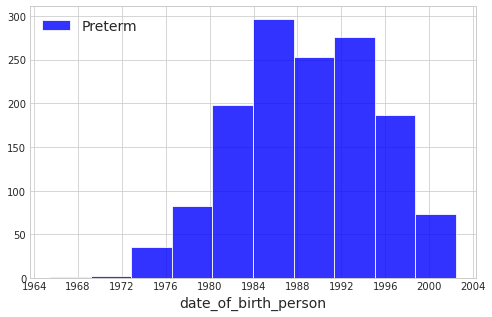

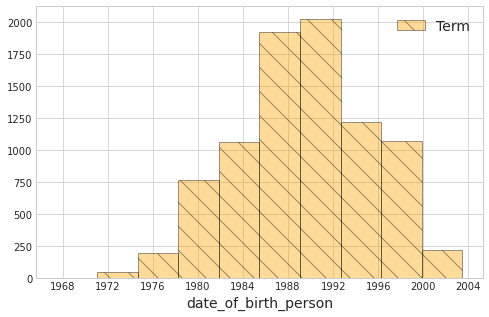

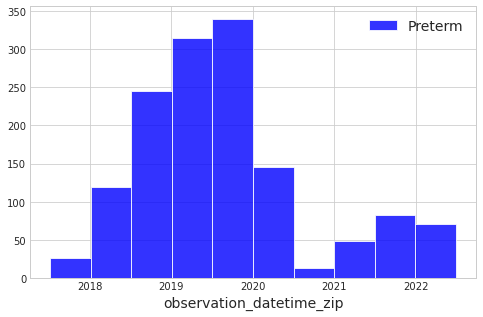

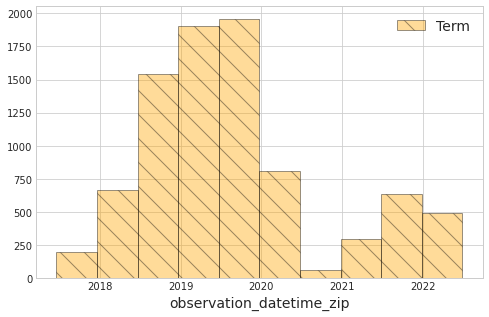

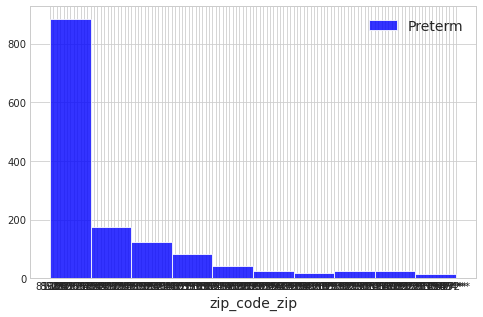

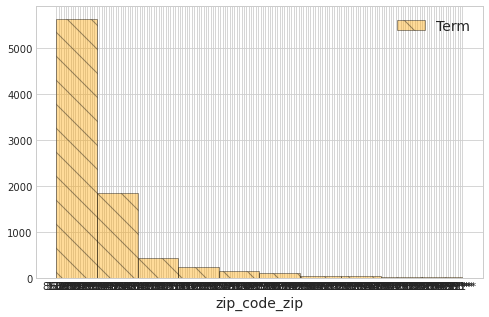

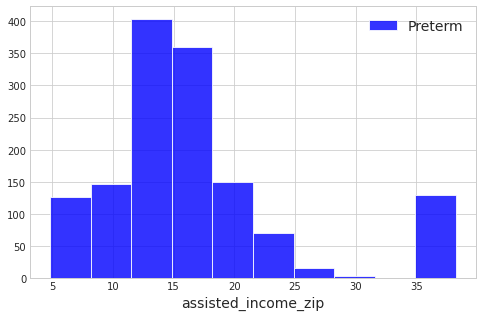

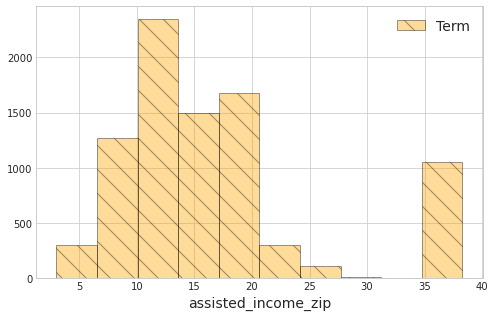

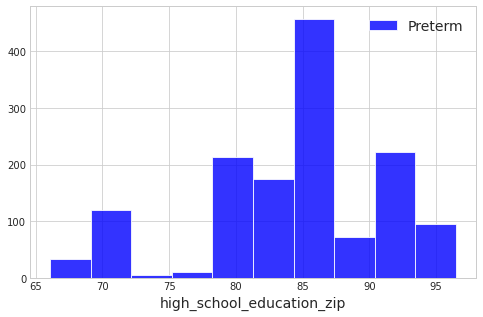

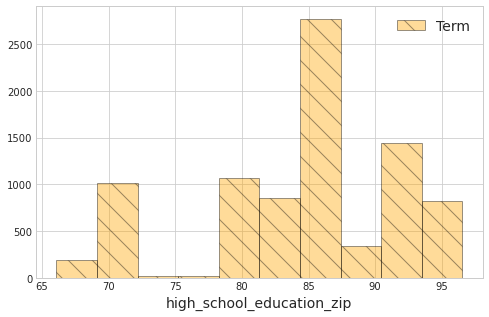

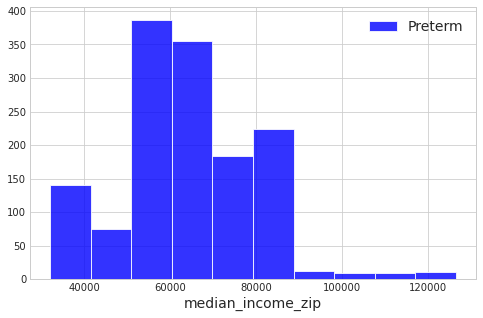

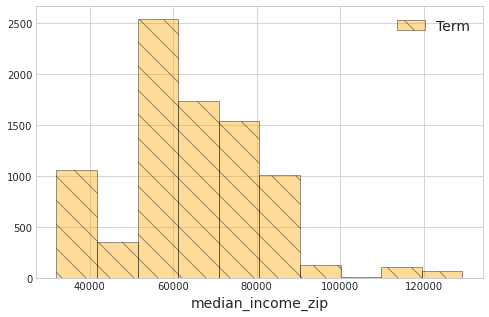

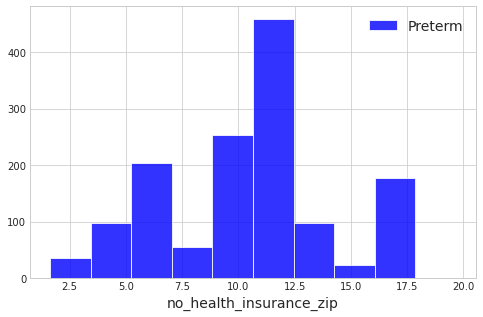

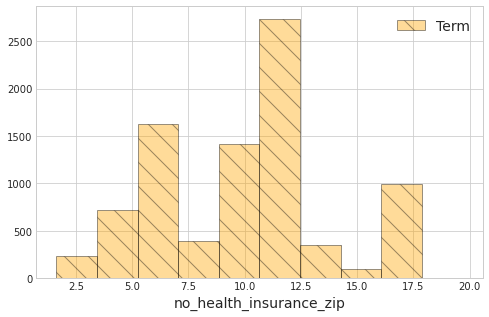

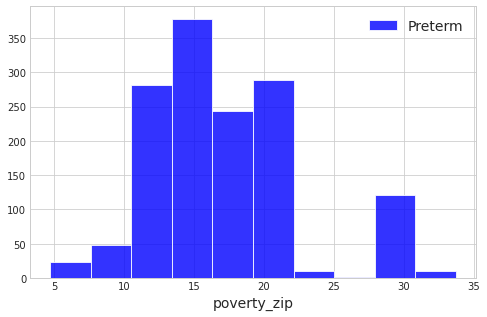

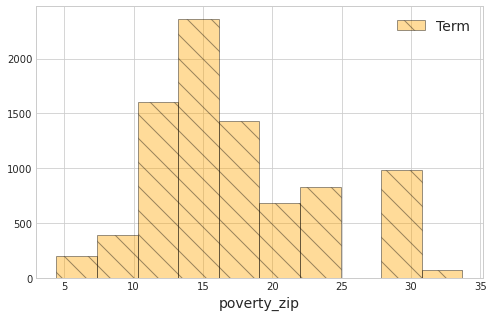

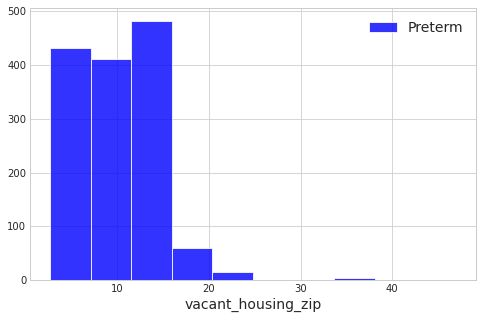

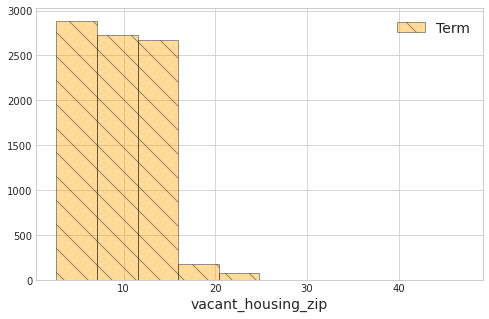

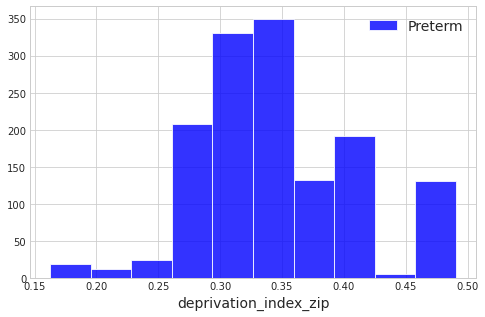

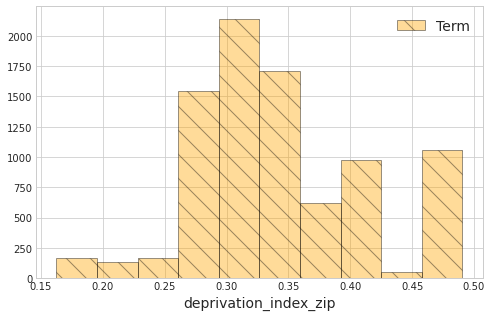

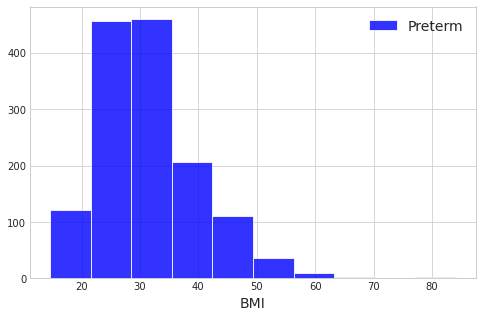

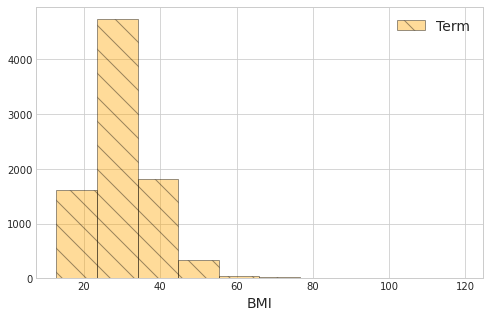

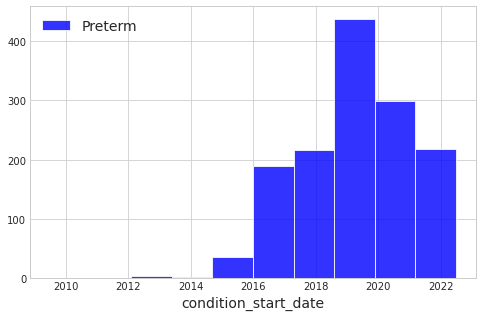

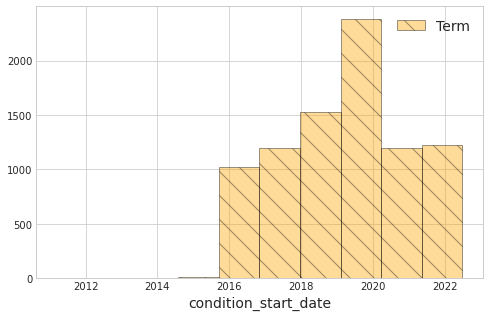

In [28]:
# For our continuous features, we begin by making histograms to see how well
# each continuous feature distinguishes term vs preterm

# Since there is such a big difference in total number of observed
# term vs preterm, I am creating different plots for each feature

for feat in cont_feat:
    plt.figure(figsize=(8,5))


    plt.hist(birth_train.loc[birth_train.birth_class_binary==0, feat].values,
                color='blue',
                alpha=.8,
                label="Preterm")

    plt.xlabel(feat, fontsize=14)
    plt.legend(fontsize=14)
    
    plt.figure(figsize=(8,5))

    plt.hist(birth_train.loc[birth_train.birth_class_binary==1, feat].values,
                color='orange',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="Term")

    plt.xlabel(feat, fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

Not as interesting:
date_of_birth_person, observation_datetime, condition_start_date

Seem most interesting:
assisted_income_zip, median_income_zip, no_health_insurance_zip, vacant_housing_zip, deprivation_index_zip, BMI

### Training: Baseline Model

Based on our normalized value counts, our baseline model is a random coin flip with probability matching the likelihood of our term births (0.859).

In [31]:
# We create an ndarray of random binomial pulls with a probability of having 

baseline_obs = []

for obs in range(1000):
    draw = np.random.binomial(n=1,
                             p=0.859,
                             size=len(birth_train))
    
    baseline_obs.append(recall_score(birth_train.birth_class_binary.values, draw))

print("Here are some statistics for the recall score of our baseline:")
print("Mean - " + str( round( np.mean(baseline_obs), 6 ) ) )
print("Median - " + str( round( np.median(baseline_obs), 6 ) ) )

Here are some statistics for the recall score of our baseline:
Mean - 0.85917
Median - 0.859254


### One-hot encoding

For logistic regression, we need to take our categorical features and create indicators for each class of each feature

In [50]:
birth_train.loc[:,"None Indicated_race"] = pd.get_dummies(birth_train['race_person'])['None Indicated'].copy()
birth_train.loc[:,"White_race"] = pd.get_dummies(birth_train['race_person'])['White'].copy()
birth_train.loc[:,"Black or African American_race"] = pd.get_dummies(birth_train['race_person'])['Black or African American'].copy()
birth_train.loc[:,"Asian_race"] = pd.get_dummies(birth_train['race_person'])['Asian'].copy()
birth_train.loc[:,"More than one_race"] = pd.get_dummies(birth_train['race_person'])['More than one population'].copy()
# birth_train.loc[:,"PMI: Skip"] = pd.get_dummies(birth_train['race_person'])['PMI: Skip'].copy()
# only need n-1, so leaving out "PMI: Skip"
birth_train.loc[:,"Middle Eastern or North African_race"] = pd.get_dummies(birth_train['race_person'])['Middle Eastern or North African'].copy()
birth_train.loc[:,"None of these_race"] = pd.get_dummies(birth_train['race_person'])['None of these'].copy()
birth_train.loc[:,"Prefer not to answer_race"] = pd.get_dummies(birth_train['race_person'])['I prefer not to answer'].copy()
birth_train.loc[:,"Native Hawaiian or Other Pacific Islander_race"] = pd.get_dummies(birth_train['race_person'])['Native Hawaiian or Other Pacific Islander'].copy()



birth_train.loc[:,"Female_gender"] = pd.get_dummies(birth_train['gender_person'])['Female'].copy()
# birth_train.loc[:,"PMI: Skip"] = pd.get_dummies(birth_train['gender_person'])['PMI: Skip'].copy()
birth_train.loc[:,"Male_gender"] = pd.get_dummies(birth_train['gender_person'])['Male'].copy()
birth_train.loc[:,"Other_gender"] = pd.get_dummies(birth_train['gender_person'])['Not man only, not woman only, prefer not to answer, or skipped'].copy()
birth_train.loc[:,"Prefer not to answer_gender"] = pd.get_dummies(birth_train['gender_person'])['I prefer not to answer'].copy()
birth_train.loc[:,"Non-Binary_gender"] = pd.get_dummies(birth_train['gender_person'])['Gender Identity: Non Binary'].copy()
birth_train.loc[:,"Additional Options_gender"] = pd.get_dummies(birth_train['gender_person'])['Gender Identity: Additional Options'].copy()



birth_train.loc[:,"Not Hispanic or Latino_eth"] = pd.get_dummies(birth_train['ethnicity_person'])['Not Hispanic or Latino'].copy()
birth_train.loc[:,"Hispanic or Latino_eth"] = pd.get_dummies(birth_train['ethnicity_person'])['Hispanic or Latino'].copy()
# birth_train.loc[:,"PMI: Skip"] = pd.get_dummies(birth_train['ethnicity_person'])['PMI: Skip'].copy()
birth_train.loc[:,"None of These_eth"] = pd.get_dummies(birth_train['ethnicity_person'])['What Race Ethnicity: Race Ethnicity None Of These'].copy()
birth_train.loc[:,"Prefer not to answer_eth"] = pd.get_dummies(birth_train['ethnicity_person'])['PMI: Prefer Not To Answer'].copy()



birth_train.loc[:,"Female_sex"] = pd.get_dummies(birth_train['sex_at_birth_person'])['Female'].copy()
# birth_train.loc[:,"PMI: Skip"] = pd.get_dummies(birth_train['gender_person'])['PMI: Skip'].copy()
birth_train.loc[:,"Male_sex"] = pd.get_dummies(birth_train['sex_at_birth_person'])['Male'].copy()
birth_train.loc[:,"No matching concept_sex"] = pd.get_dummies(birth_train['sex_at_birth_person'])['No matching concept'].copy()
birth_train.loc[:,"Prefer not to answer_sex"] = pd.get_dummies(birth_train['sex_at_birth_person'])['I prefer not to answer'].copy()
birth_train.loc[:,"Intersex_sex"] = pd.get_dummies(birth_train['sex_at_birth_person'])['Intersex'].copy()


birth_train.loc[:,"Second_birth"] = pd.get_dummies(birth_train['birth_order'])[2].copy()

In [51]:
birth_train.head()

,person_id,gender_person,date_of_birth_person,race_person,ethnicity_person,sex_at_birth_person,observation_datetime_zip,zip_code_zip,assisted_income_zip,high_school_education_zip,median_income_zip,no_health_insurance_zip,poverty_zip,vacant_housing_zip,deprivation_index_zip,american_community_survey_year_zip,BMI,condition_start_date,birth_class,gestational_age_at_birth,birth_order,birth_class_binary,None Indicated_race,White_race,Black or African American_race,Asian_race,More than one_race,Middle Eastern or North African_race,None of these_race,Prefer not to answer_race,Native Hawaiian or Other Pacific Islander_race,Female_gender,Male_gender,Other_gender,Prefer not to answer_gender,Non-Binary_gender,Additional Options_gender,Not Hispanic or Latino_eth,Hispanic or Latino_eth,None of These_eth,Prefer not to answer_eth,Female_sex,Male_sex,No matching concept_sex,Prefer not to answer_sex,Intersex_sex,Second_birth
12540,7246077,Female,1982-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2021-06-10 17:26:56+00:00,853**,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2017,34.700001,2017-10-27,Term,40.0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
13138,9393570,Female,1992-06-15 00:00:00+00:00,None Indicated,Hispanic or Latino,Female,2021-12-13 17:25:21+00:00,853**,13.019775,85.134547,61580.823283,10.762228,13.981854,12.360850,0.331276,2017,24.000000,2022-01-06,Preterm,36.0,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
10175,3098598,Female,1994-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-02-14 20:38:00+00:00,352**,15.225864,90.811209,61024.188411,10.300264,18.208478,13.866312,0.332554,2017,35.799999,2021-05-03,Term,38.0,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
12380,6629508,Female,1981-06-15 00:00:00+00:00,White,Not Hispanic or Latino,Female,2022-04-21 02:55:08+00:00,152**,13.313458,93.789391,60080.505422,5.502843,14.925582,10.289364,0.291886,2017,47.599998,2017-09-12,Term,39.0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4559,1727745,Female,1993-06-15 00:00:00+00:00,Black or African American,Not Hispanic or Latino,Female,2019-11-11 20:30:00+00:00,606**,22.052377,82.824128,56305.954102,12.871878,20.587741,12.200645,0.388458,2017,26.799999,2019-07-28,Term,37.0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


### Training: Our First Model

Similarly, we will use stratified 10-fold cross validation to account for the smaller percentage of pre-term births

In [32]:
kfold_splits = 10

kfold = StratifiedKFold(kfold_splits, shuffle=True, random_state=123)

In [52]:
model_feat = ['assisted_income_zip', 'high_school_education_zip', 'median_income_zip',
              'no_health_insurance_zip', 'poverty_zip', 'vacant_housing_zip', 'deprivation_index_zip',
              'BMI']

# Add one-hot encoded race features
model_feat.extend(["None Indicated_race", "White_race", "Black or African American_race", "Asian_race",
                  "More than one_race", "Middle Eastern or North African_race", "None of these_race",
                  "Prefer not to answer_race", "Native Hawaiian or Other Pacific Islander_race"])

# Add one-hot encoded gender features
model_feat.extend(["Female_gender", "Male_gender", "Other_gender", "Prefer not to answer_gender",
                   "Non-Binary_gender", "Additional Options_gender"])

# Add one-hot encoded ethnicity features
model_feat.extend(["Not Hispanic or Latino_eth", "Hispanic or Latino_eth", "None of These_eth",
                  "Prefer not to answer_eth"])

# Add one-hot encoded sex at birth features
model_feat.extend(["Female_sex", "Male_sex", "No matching concept_sex", "Prefer not to answer_sex",
                  "Intersex_sex"])

# Add one-hot encoded birth order (may or may not be necessary?)
model_feat.extend(["Second_birth"])

In [54]:
recalls = np.zeros(kfold_splits)

counter = 0
for train_index, test_index in kfold.split(birth_train, birth_train.birth_class_binary):
    birth_tt = birth_train.iloc[train_index]
    birth_ho = birth_train.iloc[test_index]

    log_reg = LogisticRegression(penalty='none')
        
    log_reg.fit(birth_tt[model_feat].values, birth_tt.birth_class_binary.values)
        
    pred = log_reg.predict(birth_ho[model_feat].values)
    
    recalls[counter] = recall_score(birth_ho.birth_class_binary.values, pred)
    
    counter += 1

In [55]:
print(recalls)

[1.         1.         1.         1.         1.         1.
 1.         1.         0.99883041 1.        ]


# Old EDA (scheduled to delete)

In [ ]:
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Show all data in a pairplot
sns.pairplot(combined_df)
plt.show()

# Value count for ethnicity

combined_df.value_counts("ethnicity_df3")

# Value count for race
combined_df.value_counts("race_df3")

# Income
plt.figure(figsize=(6,4))
combined_df.median_income_df4.hist()
plt.xlabel('Median Income ($)')
plt.ylabel('Count')

# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Race")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

# Swarm plot for race & median income
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.median_income_df4)
plt.xlabel("Ethnicity")
plt.ylabel("Median Income ($)")
plt.xticks(rotation=90)
plt.show()

# Education
plt.figure(figsize=(6,4))
combined_df.high_school_education_df4.hist()
plt.xlabel('% of people in zipcode who completed high school')
plt.ylabel('Count')

# Swarm plot for race & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.race_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Race")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()


# Swarm plot for ethnicity & education
plt.figure(figsize=(14,6))
sns.swarmplot(data = combined_df,
             x = combined_df.ethnicity_df3,
             y = combined_df.high_school_education_df4)
plt.xlabel("Ethnicity")
plt.ylabel("% of people in zipcode who completed high school")
plt.xticks(rotation=90)
plt.show()



# Scatter plot for education & income
sns.scatterplot(data = combined_df,
                vars=[]
                
                x = combined_df.high_school_education_df4,
                y = combined_df.median_income_df4)
sns.pairplot(dataset_copy, vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'], hue = "Outcome", markers=["o", "s"])

plt.xlabel("% of people in zipcode who completed high school")
plt.ylabel("Median income in that zipcode")
plt.xticks(rotation=90)
plt.show()



# Bar plot for race

combined_df.race_df3.value_counts().plot(kind = 'barh')



# Bar plot for ethnicity

combined_df.ethnicity_df3.value_counts().plot(kind = 'barh')